# Analyzing the NHGRI datasets in caninedc.org

### 1. Introduction to the dataset
The Canine Data Commons supports the management, analysis and sharing of genomics data for the canine research community and aims to accelerate opportunities for discovery and development for the treatment and prevention of canine cancer. 

MORE INFO ON THE DATASET... TBD

### 2. Install dependencies and import python libraries

In [11]:
# Dependencies if required:
# !pip install --force --upgrade gen3 --ignore-installed certifi
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# warnings.filterwarnings("ignore")

In [3]:
# Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns                 
import matplotlib.pyplot as plt
import warnings
import re
from pandas import DataFrame

In [4]:
pip install gen3

Note: you may need to restart the kernel to use updated packages.


### 3. Start interacting with the data commons by authentication using the SDK
The Gen3 PSDK for Python provides classes and functions for handling common tasks when interacting with a Gen3 commons. The API for a commons can be overwhelming, so this SDK aims to simplify communication with various microservices in a clear Python package. More info [here](https://github.com/uc-cdis/gen3sdk-python).

In [5]:
# Import Gen SDK tools
import gen3
from gen3.auth import Gen3Auth
from gen3.submission import Gen3Submission
from gen3.index import Gen3Index

In [105]:
# Define the URL of the Gen3 commons = API endpoint 
endpoint = "https://caninedc.org/"

In [106]:
# Download the credentials under https://caninedc.org/identity 
creds = "canine_creds.json"

In [11]:
# Setup SDK
auth = Gen3Auth(endpoint, creds)
sub = Gen3Submission(endpoint, auth)
#home_directory = "/Users/xeniaritter/Documents/CDIS_Tasks/Goals20-21/canine"  #or use os.getcwd() 
home_directory = os.getcwd()

### 4. Download metadata from the dataset "NHGRI" using the SDK

In [12]:
# Query program and project of interest (to be found in the commons.url/submission)
program = "Canine"
project = "NHGRI"

In [13]:
# Find the nodes of interest in the project.
# Nodes of interest in this notebook: study, subject, genotyping_array, and aliquot node
# Export the metadata that is stored under the nodes using the SDK function "export_node":
# Syntax: subject_data = sub.export_node(program, project, node_type, fileformat, filename)

subject_data = sub.export_node(program, project, "subject", "tsv", home_directory + "/subject.tsv")
sample_data = sub.export_node(program, project, "sample", "tsv", home_directory + "/sample.tsv")


# not used:
#study_data = sub.export_node(program, project, "study", "tsv", home_directory + "/study.tsv")
#genotyping_data = sub.export_node(program, project, "genotyping_array", "tsv", home_directory + "/genotyping_array.tsv")
#aliquot_data = sub.export_node(program, project, "aliquot", "tsv", home_directory + "/aliquot.tsv")


Output written to file: /home/jovyan/subject.tsv

Output written to file: /home/jovyan/sample.tsv


### 5. Load NHGRI Dataset to Pandas, show dataframe, group, and plot

In [99]:
# Load subject tsv file to the Pandas dataframe with regex delimiter '\t'.
#subject = pd.read_csv("/Users/xeniaritter/Documents/CDIS_Tasks/Goals20-21/canine/subject.tsv", sep='\t', header=0)
subject = pd.read_csv("subject.tsv", sep='\t', header=0)

# The "subject" is now the dataframe and we can run Pandas functions on it by adding a ".function" 

# Return the dataframe "subject" (a selection of the first and last entries)
subject

,type,id,project_id,submitter_id,breed,days_to_lost_to_followup,disease_type,index_date,lost_to_followup,primary_site,species,tissue_source_site_code,studies.id,studies.submitter_id
0,subject,05f90a4e-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608300-5fc1-11e9-8647-d663bd873d93,Norwich Terrier,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1,subject,05f9102a-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a60844a-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
2,subject,05f911b0-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608580-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
3,subject,05f912fa-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6086b6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
4,subject,05f91426-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6087f6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,subject,fa51c014-5fbc-11e9-8647-d663bd873d93,Canine-NHGRI,1a607bee-5fc1-11e9-8647-d663bd873d93,Golden Retriever,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1086,subject,fa51c140-5fbc-11e9-8647-d663bd873d93,Canine-NHGRI,1a607d6a-5fc1-11e9-8647-d663bd873d93,Great Pyrenees,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1087,subject,fa51c258-5fbc-11e9-8647-d663bd873d93,Canine-NHGRI,1a607f04-5fc1-11e9-8647-d663bd873d93,Great Pyrenees,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1088,subject,fa51c37a-5fbc-11e9-8647-d663bd873d93,Canine-NHGRI,1a60804e-5fc1-11e9-8647-d663bd873d93,Great Pyrenees,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441


In [100]:
# Return the top 5 rows of the dataframe "subject" using the function .head()
subject.head()

,type,id,project_id,submitter_id,breed,days_to_lost_to_followup,disease_type,index_date,lost_to_followup,primary_site,species,tissue_source_site_code,studies.id,studies.submitter_id
0,subject,05f90a4e-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608300-5fc1-11e9-8647-d663bd873d93,Norwich Terrier,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
1,subject,05f9102a-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a60844a-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
2,subject,05f911b0-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a608580-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
3,subject,05f912fa-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6086b6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441
4,subject,05f91426-5fbd-11e9-8647-d663bd873d93,Canine-NHGRI,1a6087f6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,NaN,healthy,NaN,NaN,whole blood,Canis lupus familiaris,whole blood,4a175584-5fbb-11e9-8647-d663bd873d93,GSE90441


In [15]:
# return info on the dataframe
subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      1090 non-null   object 
 1   id                        1090 non-null   object 
 2   project_id                1090 non-null   object 
 3   submitter_id              1090 non-null   object 
 4   breed                     1090 non-null   object 
 5   days_to_lost_to_followup  0 non-null      float64
 6   disease_type              1090 non-null   object 
 7   index_date                0 non-null      float64
 8   lost_to_followup          0 non-null      float64
 9   primary_site              1090 non-null   object 
 10  species                   1090 non-null   object 
 11  tissue_source_site_code   1090 non-null   object 
 12  studies.id                1090 non-null   object 
 13  studies.submitter_id      1090 non-null   object 
dtypes: float

In [16]:
# return the format of the datafram in (rows, columns)
subject.shape

(1090, 14)

In [17]:
# Dropping all columns that have NaN as values and replacing the previous dataframe
subject_clean = subject.dropna(axis = 1, how = 'all')
subject_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   type                     1090 non-null   object
 1   id                       1090 non-null   object
 2   project_id               1090 non-null   object
 3   submitter_id             1090 non-null   object
 4   breed                    1090 non-null   object
 5   disease_type             1090 non-null   object
 6   primary_site             1090 non-null   object
 7   species                  1090 non-null   object
 8   tissue_source_site_code  1090 non-null   object
 9   studies.id               1090 non-null   object
 10  studies.submitter_id     1090 non-null   object
dtypes: object(11)
memory usage: 93.8+ KB


In [18]:
# return the dataframe shape without NaN-containing columns
subject_clean.shape

(1090, 11)

In [19]:
# return only one column from dataframe "subject". We show two out of many options to do this.
# option 1: call the name of the column in the dataframe
subject_clean['species']  

0       Canis lupus familiaris
1       Canis lupus familiaris
2       Canis lupus familiaris
3       Canis lupus familiaris
4       Canis lupus familiaris
                 ...          
1085    Canis lupus familiaris
1086    Canis lupus familiaris
1087    Canis lupus familiaris
1088    Canis lupus familiaris
1089    Canis lupus familiaris
Name: species, Length: 1090, dtype: object

In [20]:
# option 2: use the function "iloc"
subject_clean.iloc[:, 7]

0       Canis lupus familiaris
1       Canis lupus familiaris
2       Canis lupus familiaris
3       Canis lupus familiaris
4       Canis lupus familiaris
                 ...          
1085    Canis lupus familiaris
1086    Canis lupus familiaris
1087    Canis lupus familiaris
1088    Canis lupus familiaris
1089    Canis lupus familiaris
Name: species, Length: 1090, dtype: object

In [101]:
# Removing columns not necessary for data analysis with the function "drop" and call out the names of the columns
subject_clean_slim = subject_clean.drop(columns=['type', 'id', 'project_id', 'studies.id', 'studies.submitter_id'])
subject_clean_slim.head()

,submitter_id,breed,disease_type,primary_site,species,tissue_source_site_code
0,1a608300-5fc1-11e9-8647-d663bd873d93,Norwich Terrier,healthy,whole blood,Canis lupus familiaris,whole blood
1,1a60844a-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
2,1a608580-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
3,1a6086b6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood
4,1a6087f6-5fc1-11e9-8647-d663bd873d93,Old English Sheepdog,healthy,whole blood,Canis lupus familiaris,whole blood


In [22]:
# We can count the occurrences of different breeds with the function.
# Option 1: Use the function "value_counts"
subject_clean_slim_breeds = subject_clean_slim.breed.value_counts()
print(subject_clean_slim_breeds)

Saluki                29
Standard Schnauzer    17
Saint Bernard         17
Italian Greyhound     17
Great Pyrenees        13
                      ..
Puli                   2
Golden Jackal          2
Unknown                1
Dingo                  1
Norwegian Elkhound     1
Name: breed, Length: 132, dtype: int64


In [23]:
# Option 2: Use the function "groupby" and let Pandas show the counts in ascending size order using "sort_values": 
subject_clean_slim.groupby('breed').size().sort_values(ascending=False)


breed
Saluki                29
Saint Bernard         17
Italian Greyhound     17
Standard Schnauzer    17
Great Pyrenees        13
                      ..
Parson Russell         2
Puli                   2
Unknown                1
Dingo                  1
Norwegian Elkhound     1
Length: 132, dtype: int64

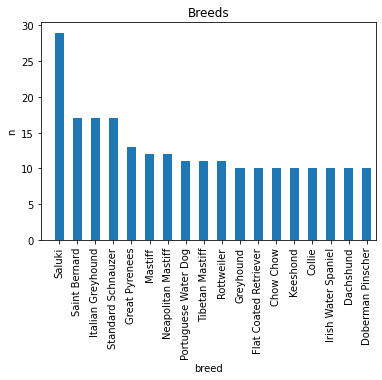

In [24]:
# We can directly plot the top entries using matplotlib.pyplot as plt (defined in the beginning)
subject_clean_slim.groupby('breed').size().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('n')
plt.title('Breeds')
plt.xlim(-1, 17.5) # setting the limits to the first 18 entries (instead of the full 132)
plt.show()

In [150]:
# Option 3: We can also show the top entries with the function pivot_table and save it as a new file 
countsbreed=subject_clean_slim.pivot_table(index=['breed'], aggfunc='size')
print(countsbreed)
countsbreed.shape

# Save the file to csv
countsbreed.to_csv('countsbreed.csv')

# Loading the saved file
counts_breed = pd.read_csv("countsbreed.csv", header=0)

# Renaming the column names with the function "columns" 
counts_breed.columns = ['breed', 'counts'] 
counts_breed.head(10) # shows the first 10 rows

breed
Afghan Hound                   10
Airedale Terrier                3
Akita                          10
Alaskan Malamute               10
American Cocker Spaniel        10
                               ..
Whippet                        10
Wirehaired Pointing Griffon     6
Wolf                            7
Xigou                           5
Yorkshire Terrier              10
Length: 132, dtype: int64


,breed,counts
0,Afghan Hound,10
1,Airedale Terrier,3
2,Akita,10
3,Alaskan Malamute,10
4,American Cocker Spaniel,10
5,American Hairless Terrier,10
6,American Staffordshire Bull Terrier,2
7,Anatolian Shepherd,6
8,Australian Cattle Dog,2
9,Australian Kelpie,2


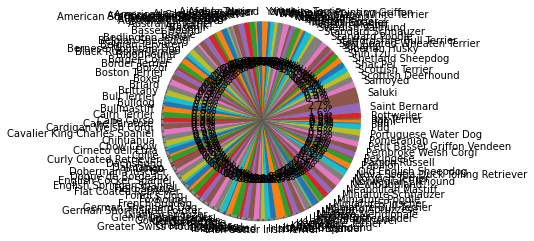

In [151]:
# Return a pie chart of all the breeds
data = counts_breed["counts"]
categories = counts_breed["breed"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# --> Messy display


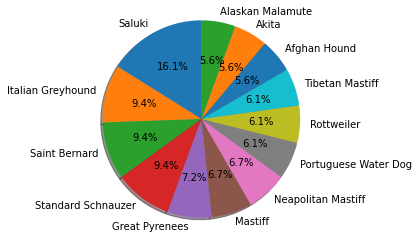

In [188]:
# Pie chart with top 13 entries only
top13 = counts_breed[counts_breed.counts > 9].nlargest(13, 'counts') # top 13 entries with counts > 9
data = top13['counts']
categories = bla["breed"]

fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



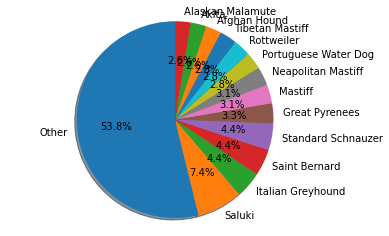

In [224]:
# Set limits for a the counts and separate into two bins. Those below 9 counts and those above.
# The first row keeps the count above 9 as the original "breed" and change the counts below 9 to "Other"
counts_breed["new_breed"] = np.where(counts_breed["counts"] >9, counts_breed['breed'], 'Other')

# Using the groupby function from before, we again count the amount of entries of each breed
count_table = counts_breed.groupby('new_breed').sum() # count_table has now only one column
count_table = count_table.reset_index() # this command resets to two columns

# Return a pie chart of the top 9 
top14 = count_table[count_table.counts > 9].nlargest(14, 'counts')
data = top14["counts"]
categories = top14["new_breed"]
fig1, ax1 = plt.subplots()
ax1.pie(data, labels=categories, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [225]:
# Save the figure above
fig1. savefig('plot.png')

End of notebook.